In [ ]:
import pandas as pd

In [87]:
df=pd.read_excel("SentimentAnalysis.xlsx")

In [88]:
df.sample(5)

,Comments Text
6379,Me with depression and anxiety. Several police...
2435,"I turn to gratitude....grateful for my job, pa..."
2935,Every cell and every organ of your body depend...
2239,"Marilyn Corrado ah yes, I can see the symptoms..."
3770,"One day you will, I'm learning on not to dwell..."


In [ ]:
import matplotlib.pyplot as plt

In [89]:
from wordcloud import WordCloud

In [92]:

txt="".join(item.lower() for item in df["Comments Text"])

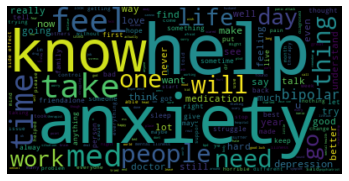

In [93]:
wordcloud=WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [94]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords,opinion_lexicon
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
stopword=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
lem=WordNetLemmatizer()

In [96]:
len(stopword)

179

In [97]:
def remove(x):
    x=re.sub("[^A-z" "]+"," ",x)
    s=""
    for i in x.split():
        if i not in stopword:
            i=lem.lemmatize(word=i)
            s=s+" "+i
    return s

In [98]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
df["Comments_clean"]=df["Comments Text"].apply(remove)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Comments Text,Comments_clean
0,"So, when you ask what the two illnesses are......",So ask two illness similar tend moodiness inv...
1,"In addition, people with BPD quite often have ...",In addition people BPD quite often weak self ...
2,"Borderline Personality Disorder, like all othe...",Borderline Personality Disorder like personal...
3,LONG ANSWER: Bipolar disease is caused by a ch...,LONG ANSWER Bipolar disease caused chemical i...
4,Well think of bipolar as a rollar coaster you ...,Well think bipolar rollar coaster high low pe...


In [100]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.9 MB/s eta 0:00:00


In [101]:
vs=SentimentIntensityAnalyzer()

In [102]:
vs.emojis['😀']

'grinning face'

In [104]:
vs.polarity_scores(df["Comments_clean"][3])

{'neg': 0.309, 'neu': 0.586, 'pos': 0.105, 'compound': -0.9905}

In [105]:
def polarity(sent):
    d=vs.polarity_scores(sent)
    #d.pop("compound")
    #val=sorted(d.items(),key=lambda x:x[1],reverse=True)[0][0]
    if d["compound"]>0.05:
        return "positive"
    elif d["compound"]<-0.05:
        return "negative"
    elif -0.05<=d["compound"]<=0.05:
        return "neutral"
    else:
        return "Check"

In [108]:
df["value"]=df["Comments_clean"].apply(polarity)
df.head()

,Comments Text,Comments_clean,value
0,"So, when you ask what the two illnesses are......",So ask two illness similar tend moodiness inv...,negative
1,"In addition, people with BPD quite often have ...",In addition people BPD quite often weak self ...,negative
2,"Borderline Personality Disorder, like all othe...",Borderline Personality Disorder like personal...,negative
3,LONG ANSWER: Bipolar disease is caused by a ch...,LONG ANSWER Bipolar disease caused chemical i...,negative
4,Well think of bipolar as a rollar coaster you ...,Well think bipolar rollar coaster high low pe...,negative


In [109]:
df.value.value_counts()

negative    4038
positive    2925
neutral      182
Name: value, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(lowercase=True)

In [ ]:
data_array=cv.fit_transform(df.Comments_clean).toarray()
data_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from tqdm import tqdm
from keras.models import Sequential


In [ ]:
import numpy as np
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(df['value'])
np.unique(labels)

array([0, 1, 2])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
x,x_test,y,y_test=train_test_split(data_array,df.value,random_state=42,test_size=.1)

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x,y)

RandomForestClassifier()

In [ ]:
accuracy_score(y_test,rf.predict(x_test))

0.779020979020979

In [110]:
df.to_csv("New_7k_clean_data.csv",index=False)